<a href="https://colab.research.google.com/github/sydney-machine-learning/COVID19_sentinentanalysis/blob/main/EDA%20%2B%20Preprocessing%20%2B%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"><h1>Canada Covid19 Tweet Dataset - Data Modeling

## **EDA**

In [ ]:
!pip install torchtext

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import unicodedata
import nltk
import csv
import string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.cluster import KMeans
import torchtext.data

In [ ]:
!pip install wordcloud

In [ ]:
!pip install textblob
!pip install demoji

In [ ]:
from textblob import TextBlob
nltk.download('all')
import demoji

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
from wordcloud import WordCloud

In [ ]:
!pip install -q transformers

In [ ]:
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
SEED = 1024
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

from torch.utils.data import TensorDataset, DataLoader, Dataset, RandomSampler, SequentialSampler
import torchtext
from torchtext import data

import transformers
from transformers import BertTokenizer, BertModel, BertConfig

import warnings
warnings.filterwarnings('ignore')
import operator

from sklearn.metrics import hamming_loss, jaccard_score, label_ranking_average_precision_score, f1_score
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

In [ ]:
!git clone https://github.com/sydney-machine-learning/COVID19_sentinentanalysissocialmedia

fatal: destination path 'COVID19_sentinentanalysissocialmedia' already exists and is not an empty directory.


In [ ]:
demoji.download_codes()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
senwave = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MLP Final Project/Sentiment Analysis/COVID19_sentiment analysis/Contribution 2024/Data Cleaning Canada Covid/preprocessed_canada_tweets.csv")
print("Length of Senwave Dataset = {}".format(len(senwave)))

Length of Senwave Dataset = 9206


In [ ]:
senwave.head(10)

,likes,screen_name,text,timestamp,tweet_id,user_id,username,city
0,1,marlawd,recent cancer patient w longstanding respirato...,2020-03-06 14:38:24,1235937783283437568,49687037,marla waltman,Toronto
1,1,marlawd,recent cancer patient w longstanding respirato...,2020-03-06 14:38:24,1235937783283437568,49687037,marla waltman,Toronto
2,4,marlawd,im supposed attend ontliberal leadership conve...,2020-03-03 14:10:21,1234843558009544704,49687037,marla waltman,Toronto
3,4,marlawd,im supposed attend ontliberal leadership conve...,2020-03-03 14:10:21,1234843558009544704,49687037,marla waltman,Toronto
4,1,ghlake,buy bulk things sale freezer stocked im good e...,2020-03-01 02:28:25,1233942136384577536,169051022,linda bowser,Toronto
5,1,ghlake,buy bulk things sale freezer stocked im good e...,2020-03-01 02:28:25,1233942136384577536,169051022,linda bowser,Toronto
6,149,HumayunJamshed,protect fatal disease like cancer corona virus...,2020-03-06 16:20:04,1235963366046347264,1096312807,humayun jamshed,Toronto
7,149,HumayunJamshed,protect fatal disease like cancer corona virus...,2020-03-06 16:20:04,1235963366046347264,1096312807,humayun jamshed,Toronto
8,2,allthebest1959,themandymoore watched walk rememberagain touch...,2020-03-01 20:02:16,1234207344940257280,1561180506,charlene best,Toronto
9,1,LadyScorcher,cancer liminal spaces im assuming youve read d...,2020-03-01 17:47:17,1234173375054012416,57463142,cheryl white,Toronto


In [ ]:
# Function to get emotion
def get_emotion(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        # Sentiment polarity ranges from -1 to 1
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
    else:
        return 'neutral'  # Handle non-string values

# Apply the function to the 'text' column
senwave['emotion'] = senwave['text'].apply(get_emotion)

In [ ]:
# Save the updated CSV file
senwave.to_csv('canada_tweet_with_emotions.csv', index=False)

In [ ]:
senwave.head(10)

,likes,screen_name,text,timestamp,tweet_id,user_id,username,city,emotion
0,1,marlawd,recent cancer patient w longstanding respirato...,2020-03-06 14:38:24,1235937783283437568,49687037,marla waltman,Toronto,negative
1,1,marlawd,recent cancer patient w longstanding respirato...,2020-03-06 14:38:24,1235937783283437568,49687037,marla waltman,Toronto,negative
2,4,marlawd,im supposed attend ontliberal leadership conve...,2020-03-03 14:10:21,1234843558009544704,49687037,marla waltman,Toronto,negative
3,4,marlawd,im supposed attend ontliberal leadership conve...,2020-03-03 14:10:21,1234843558009544704,49687037,marla waltman,Toronto,negative
4,1,ghlake,buy bulk things sale freezer stocked im good e...,2020-03-01 02:28:25,1233942136384577536,169051022,linda bowser,Toronto,positive
5,1,ghlake,buy bulk things sale freezer stocked im good e...,2020-03-01 02:28:25,1233942136384577536,169051022,linda bowser,Toronto,positive
6,149,HumayunJamshed,protect fatal disease like cancer corona virus...,2020-03-06 16:20:04,1235963366046347264,1096312807,humayun jamshed,Toronto,neutral
7,149,HumayunJamshed,protect fatal disease like cancer corona virus...,2020-03-06 16:20:04,1235963366046347264,1096312807,humayun jamshed,Toronto,neutral
8,2,allthebest1959,themandymoore watched walk rememberagain touch...,2020-03-01 20:02:16,1234207344940257280,1561180506,charlene best,Toronto,positive
9,1,LadyScorcher,cancer liminal spaces im assuming youve read d...,2020-03-01 17:47:17,1234173375054012416,57463142,cheryl white,Toronto,neutral


In [ ]:
# Function to get sentiment score
def get_sentiment_score(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    else:
        return 0.0  # Assign neutral sentiment score for non-string values

# Apply the function to the 'text' column
senwave['sentiment_score'] = senwave['text'].apply(get_sentiment_score)

# Save the updated CSV file
senwave.to_csv('canada_tweet_with_sentiment.csv', index=False)

In [ ]:
senwave.head(10)

,likes,screen_name,text,timestamp,tweet_id,user_id,username,city,emotion,sentiment_score
0,1,marlawd,recent cancer patient w longstanding respirato...,2020-03-06 14:38:24,1235937783283437568,49687037,marla waltman,Toronto,negative,-0.137143
1,1,marlawd,recent cancer patient w longstanding respirato...,2020-03-06 14:38:24,1235937783283437568,49687037,marla waltman,Toronto,negative,-0.137143
2,4,marlawd,im supposed attend ontliberal leadership conve...,2020-03-03 14:10:21,1234843558009544704,49687037,marla waltman,Toronto,negative,-0.080000
3,4,marlawd,im supposed attend ontliberal leadership conve...,2020-03-03 14:10:21,1234843558009544704,49687037,marla waltman,Toronto,negative,-0.080000
4,1,ghlake,buy bulk things sale freezer stocked im good e...,2020-03-01 02:28:25,1233942136384577536,169051022,linda bowser,Toronto,positive,0.700000
5,1,ghlake,buy bulk things sale freezer stocked im good e...,2020-03-01 02:28:25,1233942136384577536,169051022,linda bowser,Toronto,positive,0.700000
6,149,HumayunJamshed,protect fatal disease like cancer corona virus...,2020-03-06 16:20:04,1235963366046347264,1096312807,humayun jamshed,Toronto,neutral,0.000000
7,149,HumayunJamshed,protect fatal disease like cancer corona virus...,2020-03-06 16:20:04,1235963366046347264,1096312807,humayun jamshed,Toronto,neutral,0.000000
8,2,allthebest1959,themandymoore watched walk rememberagain touch...,2020-03-01 20:02:16,1234207344940257280,1561180506,charlene best,Toronto,positive,0.400000
9,1,LadyScorcher,cancer liminal spaces im assuming youve read d...,2020-03-01 17:47:17,1234173375054012416,57463142,cheryl white,Toronto,neutral,0.000000


In [ ]:
# Define emotion categories and their corresponding percentile thresholds
emotion_percentiles = {
    'Denial': 5,
    'Sad': 15,
    'Anxious': 25,
    'Pessimistic': 35,
    'Empathetic': 45,
    'Thankful': 55,
    'Official report': 65,
    'Annoyed': 75,
    'Surprise': 85,
    'Joking': 95,
    'Optimistic': 99
}

# Calculate percentile thresholds based on sentiment scores
score_percentiles = {emotion: senwave['sentiment_score'].quantile(percentile / 100) for emotion, percentile in emotion_percentiles.items()}

# Function to map sentiment score to emotion category
def map_sentiment_to_emotion(sentiment_score):
    for emotion, threshold in score_percentiles.items():
        if sentiment_score <= threshold:
            return emotion
    return 'Optimistic'  # Default to the highest emotion category if sentiment score is above the highest threshold

# Apply the function to create the new column
senwave['emotion_analysed'] = senwave['sentiment_score'].apply(map_sentiment_to_emotion)

In [ ]:
# Save the updated CSV file
senwave.to_csv('canada_tweet_with_emotions.csv', index=False)
senwave.head(10)

,likes,screen_name,text,timestamp,tweet_id,user_id,username,city,emotion,sentiment_score,emotion_analysed
0,1,marlawd,recent cancer patient w longstanding respirato...,2020-03-06 14:38:24,1235937783283437568,49687037,marla waltman,Toronto,negative,-0.137143,Sad
1,1,marlawd,recent cancer patient w longstanding respirato...,2020-03-06 14:38:24,1235937783283437568,49687037,marla waltman,Toronto,negative,-0.137143,Sad
2,4,marlawd,im supposed attend ontliberal leadership conve...,2020-03-03 14:10:21,1234843558009544704,49687037,marla waltman,Toronto,negative,-0.080000,Anxious
3,4,marlawd,im supposed attend ontliberal leadership conve...,2020-03-03 14:10:21,1234843558009544704,49687037,marla waltman,Toronto,negative,-0.080000,Anxious
4,1,ghlake,buy bulk things sale freezer stocked im good e...,2020-03-01 02:28:25,1233942136384577536,169051022,linda bowser,Toronto,positive,0.700000,Optimistic
5,1,ghlake,buy bulk things sale freezer stocked im good e...,2020-03-01 02:28:25,1233942136384577536,169051022,linda bowser,Toronto,positive,0.700000,Optimistic
6,149,HumayunJamshed,protect fatal disease like cancer corona virus...,2020-03-06 16:20:04,1235963366046347264,1096312807,humayun jamshed,Toronto,neutral,0.000000,Anxious
7,149,HumayunJamshed,protect fatal disease like cancer corona virus...,2020-03-06 16:20:04,1235963366046347264,1096312807,humayun jamshed,Toronto,neutral,0.000000,Anxious
8,2,allthebest1959,themandymoore watched walk rememberagain touch...,2020-03-01 20:02:16,1234207344940257280,1561180506,charlene best,Toronto,positive,0.400000,Surprise
9,1,LadyScorcher,cancer liminal spaces im assuming youve read d...,2020-03-01 17:47:17,1234173375054012416,57463142,cheryl white,Toronto,neutral,0.000000,Anxious


In [ ]:
senwave.columns

Index(['likes', 'screen_name', 'text', 'timestamp', 'tweet_id', 'user_id',
       'username', 'city', 'emotion', 'sentiment_score', 'emotion_analysed'],
      dtype='object')

In [ ]:
print(senwave['sentiment_score'].unique())


[-0.13714286 -0.08        0.7        ...  0.48849206  0.11333333
  0.24761905]


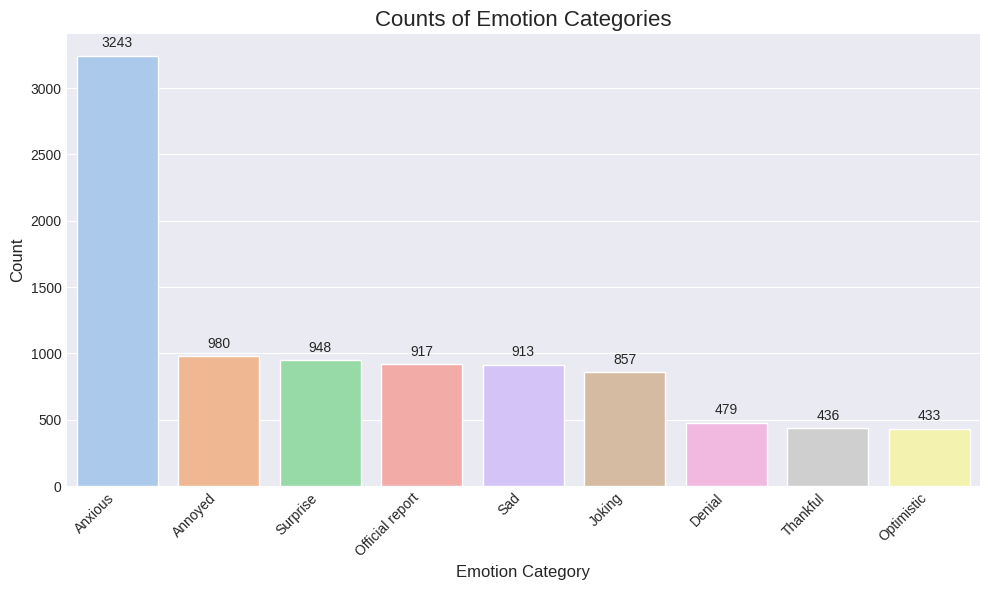

In [ ]:
# Count occurrences of each emotion category
emotion_counts = senwave['emotion_analysed'].value_counts()

# Set the style
plt.style.use('seaborn-darkgrid')

# Create a color palette
colors = sns.color_palette('pastel')

# Create the plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette=colors)

# Add annotations
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

# Set plot title and labels
plt.title('Counts of Emotion Categories', fontsize=16)
plt.xlabel('Emotion Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Define emotion categories and their corresponding thresholds or rules
emotion_mapping = {
    'Optimistic': lambda score: score >= 0.5,
    'Thankful': lambda score: 0.1 <= score < 0.5,
    'Empathetic': lambda score: -0.1 <= score < 0.1,
    'Pessimistic': lambda score: -0.5 <= score < -0.1,
    'Anxious': lambda score: -0.7 <= score < -0.5,
    'Sad': lambda score: -0.9 <= score < -0.7,
    'Annoyed': lambda score: -1 <= score < -0.9,
    'Denial': lambda score: score < -1
}

# Categorize tweets into emotions based on sentiment scores
senwave['emotion'] = senwave['sentiment_score'].apply(lambda score: next((emotion for emotion, rule in emotion_mapping.items() if rule(score)), 'Unknown'))

# Summary of the distribution of emotions in the dataset
emotion_counts = senwave['emotion'].value_counts()
print("Summary of Emotions Distribution:")
print(emotion_counts)

Summary of Emotions Distribution:
emotion
Empathetic     4008
Thankful       2930
Pessimistic    1056
Optimistic     1039
Anxious          75
Sad              49
Annoyed          49
Name: count, dtype: int64


In [ ]:
# Select a random tweet
random_tweet_index = np.random.randint(0, len(senwave))
random_tweet = senwave.loc[random_tweet_index, 'text']

# Find the sentiment score of the random tweet (assuming 'sentiment_score' column exists)
random_sentiment_score = senwave.loc[random_tweet_index, 'sentiment_score']

# Determine the emotion of the random tweet
def map_sentiment_to_emotion(score):
    for emotion, rule in emotion_mapping.items():
        if rule(score):
            return emotion
    return 'Unknown'

random_tweet_emotion = map_sentiment_to_emotion(random_sentiment_score)

# Print the random tweet, its sentiment score, and corresponding emotion
print("Random Tweet:", random_tweet)
print("Sentiment Score:", random_sentiment_score)
print("Emotion:", random_tweet_emotion)

Random Tweet: client male 50s got diagnosed brain tumor got paid promised benefit got critical illness protection 12 months ago got diagnosed life threatening illness months laterpictwittercomkdxpyt6dl7
Sentiment Score: 0.0
Emotion: Empathetic


In [ ]:
# Print non-numeric columns
non_numeric_columns = senwave.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: ['screen_name', 'text', 'timestamp', 'username', 'city', 'emotion', 'emotion_analysed']


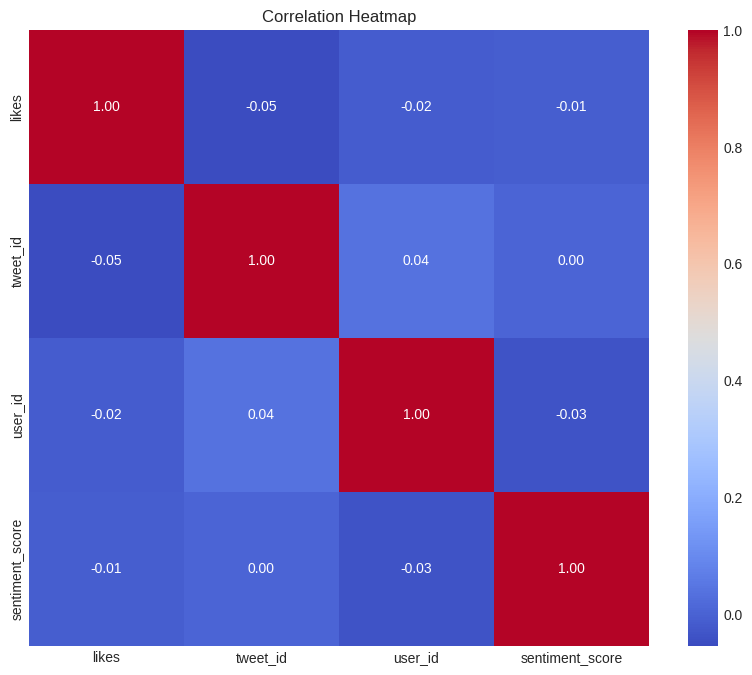

In [ ]:
# Drop non-numeric columns
non_numeric_columns = ['screen_name', 'text', 'timestamp', 'username', 'city', 'emotion', 'emotion_analysed']
numeric_data = senwave.drop(columns=non_numeric_columns, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

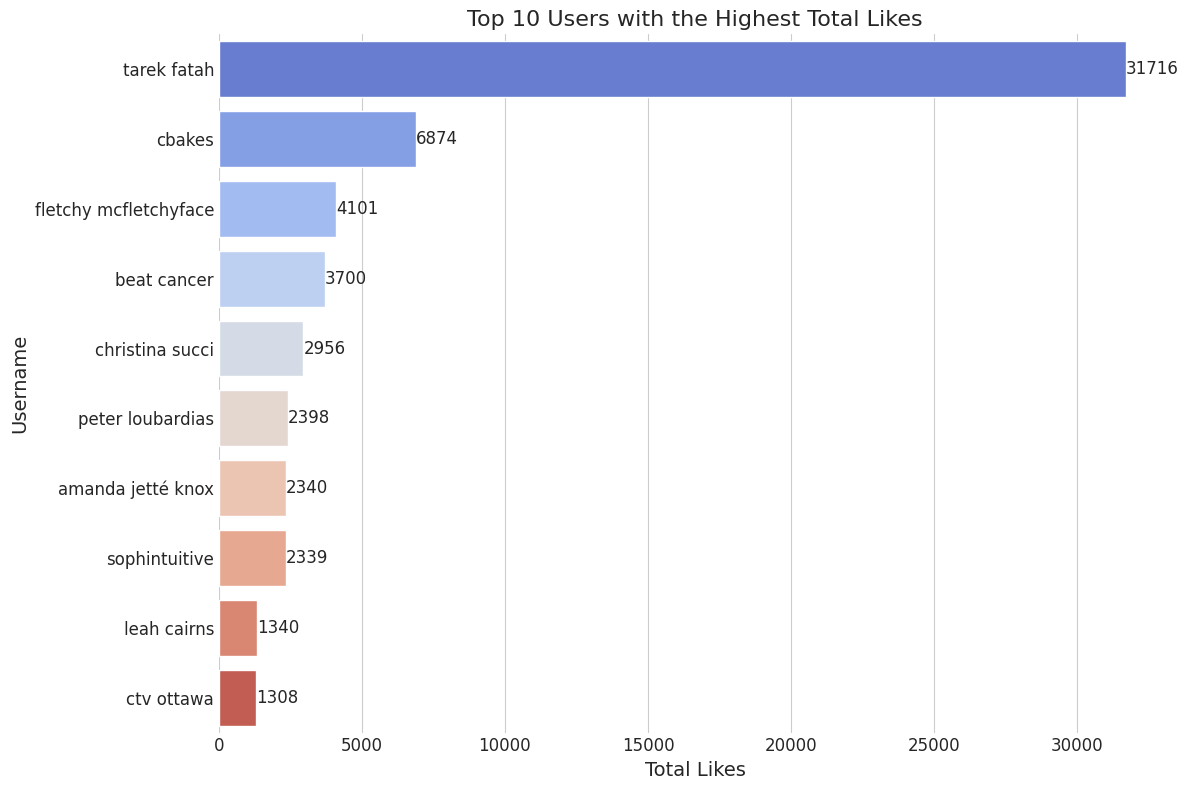

In [ ]:
# Set the style
sns.set_style("whitegrid")

# Group the data by username and sum the likes for each user
likes_by_user = senwave.groupby('username')['likes'].sum().reset_index()

# Sort the data by likes in descending order
likes_by_user = likes_by_user.sort_values(by='likes', ascending=False)

# Select the top 10 users with the highest total likes
top_10_likes_by_user = likes_by_user.head(10)

# Plot the graph
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_likes_by_user, x='likes', y='username', palette='coolwarm')

# Annotate each bar with its corresponding value
for index, value in enumerate(top_10_likes_by_user['likes']):
    plt.text(value, index, str(value), fontsize=12, ha='left', va='center')

plt.xlabel('Total Likes', fontsize=14)
plt.ylabel('Username', fontsize=14)
plt.title('Top 10 Users with the Highest Total Likes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


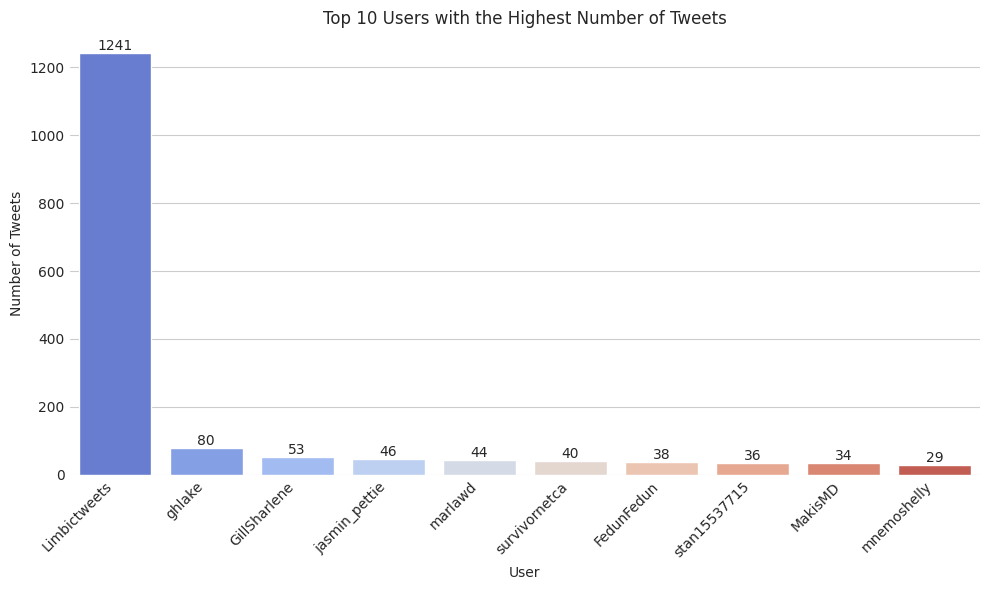

In [ ]:
# Group the dataset by the user's screen name and count the number of tweets for each user
tweet_counts = senwave['screen_name'].value_counts()

# Select only the top 10 users with the highest number of tweets
top_10_tweet_counts = tweet_counts.head(10)

# Plot a graph to visualize the distribution of tweet counts for the top 10 users
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_tweet_counts.index, y=top_10_tweet_counts.values, palette='coolwarm')

# Annotate each bar with its corresponding value
for index, value in enumerate(top_10_tweet_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Top 10 Users with the Highest Number of Tweets')
plt.xlabel('User')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Inferences:
*   We see that around 1000 people who were being optimistic also had a joke emotion attached to their tweet.
* Around 390 of the people who were being positive also had a surprise attached to their tweet. It could be probably because of some good news they weren't expecting.
* Pessimistic tweets usually were of joking nature or were displaying their annoyance.
*   When people were being thankful, it was usually towards the Government or God or People in general and therefore it made them optimistic for the future (about 240)
* About 1200 of the people who were annoyed were also joking. Displaying your annoyance through jokes never goes out of style.
* About 780 of the 2100 tweets which were sad were jokes, i.e. people were trying to drown their sadness through laughter.


**WORD CLOUDs**

**Random**

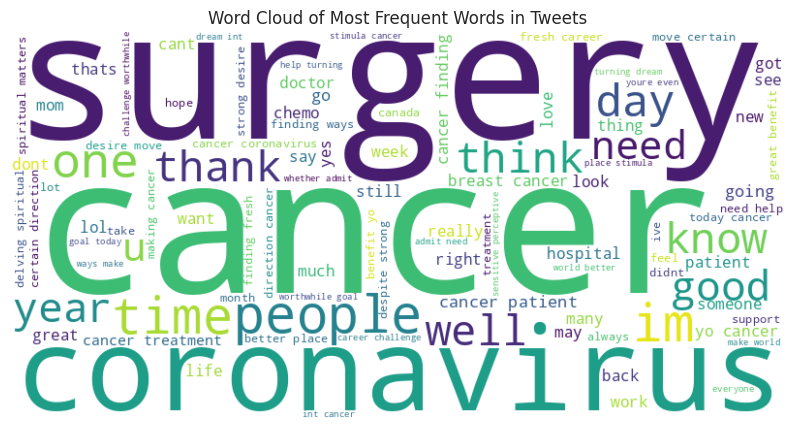

In [ ]:
# Drop rows with missing text data
senwave = senwave.dropna(subset=['text'])

# Combine text data from all tweets
text = ' '.join(senwave['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2,
                      font_path=None, stopwords=None).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Frequent Words in Tweets')
plt.axis('off')
plt.show()

**Optimism**

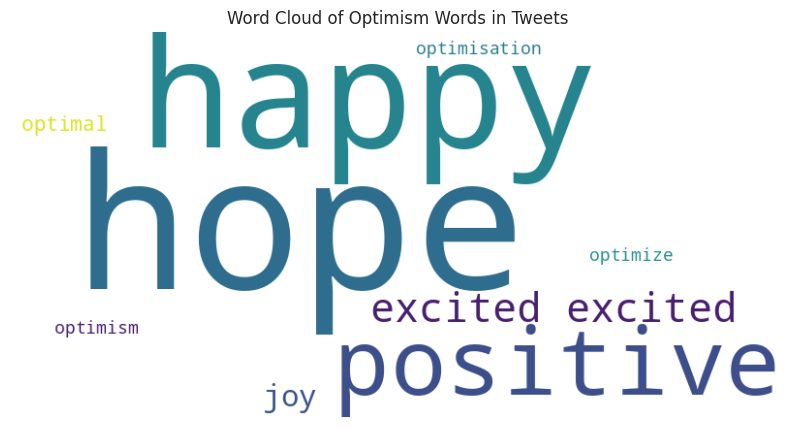

In [ ]:
# Combine text data from all tweets
text = ' '.join(senwave['text'])

# Define a regex pattern to extract optimism words
optimism_pattern = r'\b(optim\w*|hope|joy|happy|excited|positive|optimistic|cheerful)\b'

# Extract optimism words from the combined text using the regex pattern
optimism_words = re.findall(optimism_pattern, text, flags=re.IGNORECASE)

# Combine optimism words into a single string
optimism_text = ' '.join(optimism_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2,
                      font_path=None, stopwords=None).generate(optimism_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Optimism Words in Tweets')
plt.axis('off')
plt.show()

**Thankful**

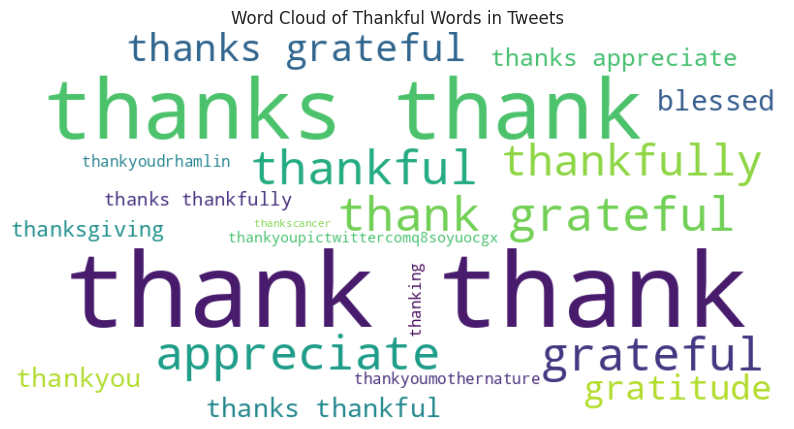

In [ ]:
# Combine text data from all tweets
text = ' '.join(senwave['text'])

# Define a regex pattern to extract thankful words
thankful_pattern = r'\b(thank\w*|grateful|appreciate|gratitude|blessed|thankful)\b'

# Extract thankful words from the combined text using the regex pattern
thankful_words = re.findall(thankful_pattern, text, flags=re.IGNORECASE)

# Combine thankful words into a single string
thankful_text = ' '.join(thankful_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2,
                      font_path=None, stopwords=None).generate(thankful_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Thankful Words in Tweets')
plt.axis('off')
plt.show()

**Political**

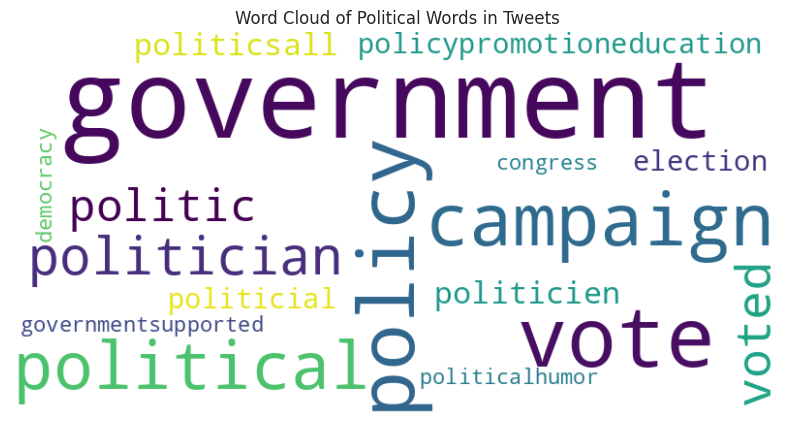

In [ ]:

# Define a regex pattern to extract political words
political_pattern = r'\b(politic\w*|government\w*|election\w*|democracy|policy\w*|legislation\w*|political\w*|vote\w*|campaign\w*|congress\w*|senate\w*)\b'

# Extract political words from the combined text using the regex pattern
political_words = re.findall(political_pattern, text, flags=re.IGNORECASE)

# Combine political words into a single string
political_text = ' '.join(political_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2,
                      font_path=None, stopwords=None).generate(political_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Political Words in Tweets')
plt.axis('off')
plt.show()

**Anxiety**

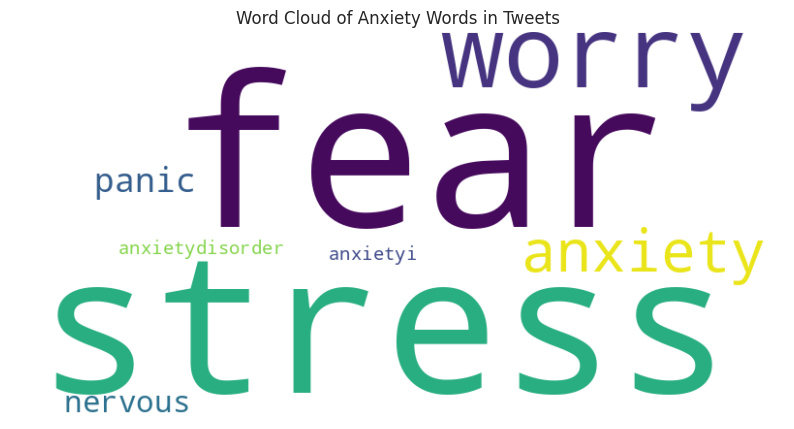

In [ ]:
# Combine text data from all tweets
text = ' '.join(senwave['text'])

# Define a regex pattern to extract anxiety words
anxiety_pattern = r'\b(anxiet\w*|stress|worry|fear|nervous|panic|tension)\b'

# Extract anxiety words from the combined text using the regex pattern
anxiety_words = re.findall(anxiety_pattern, text, flags=re.IGNORECASE)

# Combine anxiety words into a single string
anxiety_text = ' '.join(anxiety_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2,
                      font_path=None, stopwords=None).generate(anxiety_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Anxiety Words in Tweets')
plt.axis('off')
plt.show()

**Sad**

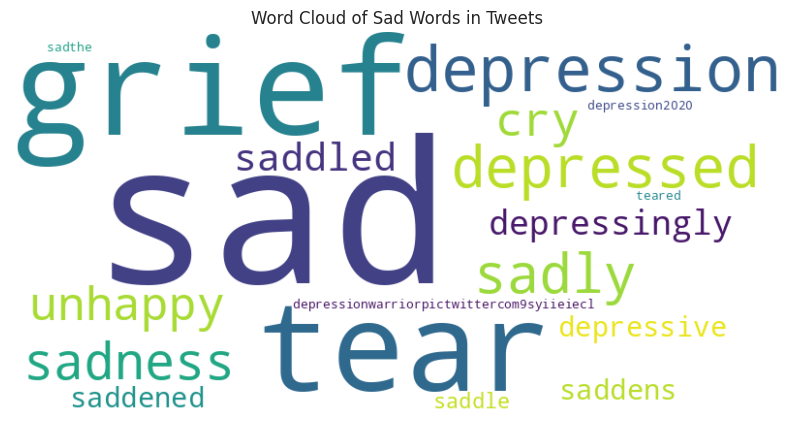

In [ ]:
# Combine text data from all tweets
text = ' '.join(senwave['text'])

# Define a regex pattern to extract sad words
sad_pattern = r'\b(sad\w*|depress\w*|unhappy|cry|tear\w*|sorrow|grief)\b'

# Extract sad words from the combined text using the regex pattern
sad_words = re.findall(sad_pattern, text, flags=re.IGNORECASE)

# Combine sad words into a single string
sad_text = ' '.join(sad_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2,
                      font_path=None, stopwords=None).generate(sad_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Sad Words in Tweets')
plt.axis('off')
plt.show()

**Official Report**

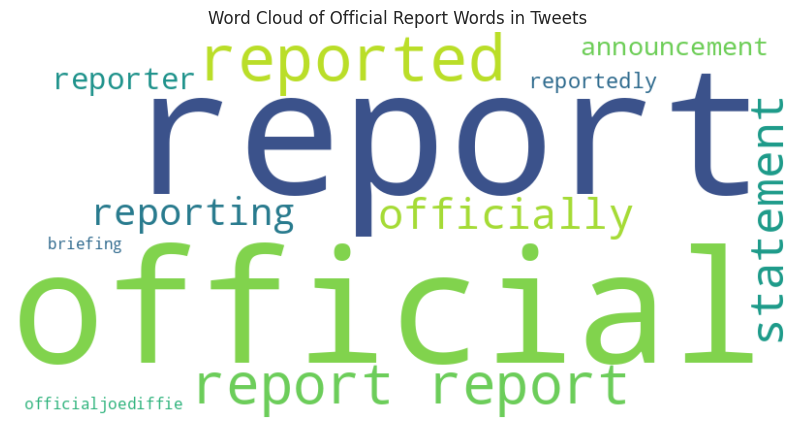

In [ ]:
# Combine text data from all tweets
text = ' '.join(senwave['text'])

# Define a regex pattern to extract official report words
official_report_pattern = r'\b(report\w*|official\w*|statement|briefing|announcement)\b'

# Extract official report words from the combined text using the regex pattern
official_report_words = re.findall(official_report_pattern, text, flags=re.IGNORECASE)

# Combine official report words into a single string
official_report_text = ' '.join(official_report_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2,
                      font_path=None, stopwords=None).generate(official_report_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Official Report Words in Tweets')
plt.axis('off')
plt.show()

**Joking**

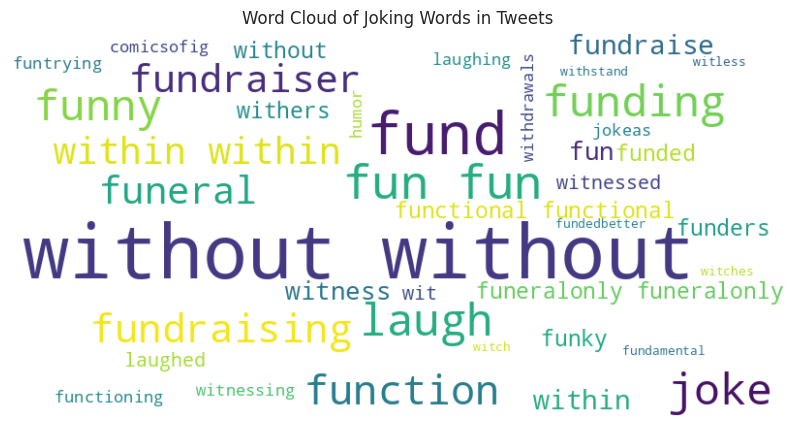

In [ ]:
# Combine text data from all tweets
text = ' '.join(senwave['text'])

# Define a regex pattern to extract joking words
joking_pattern = r'\b(joke\w*|fun\w*|humor\w*|laugh\w*|comic\w*|wit\w*|lightheart\w*|playful)\b'

# Extract joking words from the combined text using the regex pattern
joking_words = re.findall(joking_pattern, text, flags=re.IGNORECASE)

# Combine joking words into a single string
joking_text = ' '.join(joking_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2,
                      font_path=None, stopwords=None).generate(joking_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Joking Words in Tweets')
plt.axis('off')
plt.show()

**Empathy**

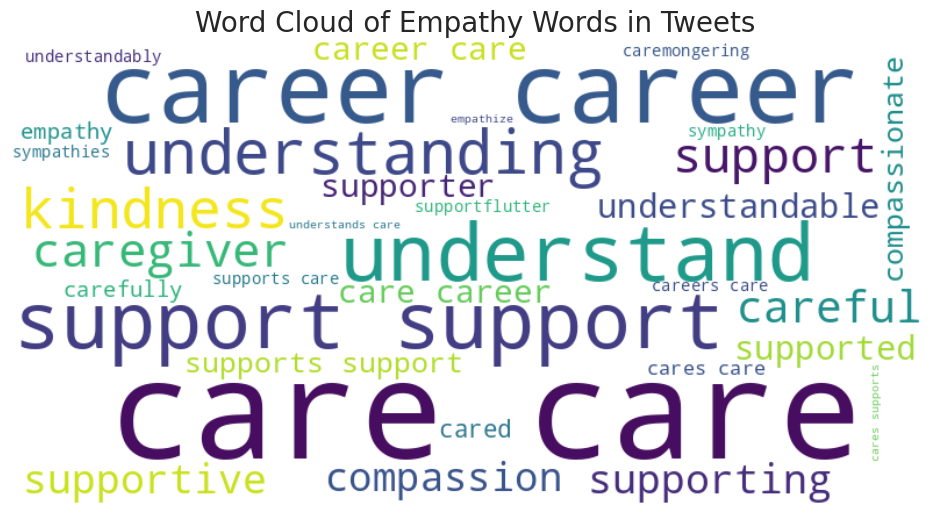

In [ ]:
# Define a regex pattern to extract empathy words
empathy_pattern = r'\b(empath\w*|support\w*|compassion\w*|understand\w*|care\w*|kindness\w*|sympath\w*)\b'

# Extract empathy words from the combined text using the regex pattern
empathy_words = re.findall(empathy_pattern, text, flags=re.IGNORECASE)

# Combine empathy words into a single string
empathy_text = ' '.join(empathy_words)

# Generate word cloud with custom styling
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=100, contour_color='steelblue', contour_width=2,
                      font_path=None, stopwords=None).generate(empathy_text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Empathy Words in Tweets', fontsize=20)
plt.axis('off')
plt.show()

**Cleaning followed by Unigram and Bigram analysis**

In [ ]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [ ]:
words = clean(''.join(str(senwave['text'].tolist())))

In [ ]:
words[:20]

['recent',
 'cancer',
 'patient',
 'w',
 'longstanding',
 'respiratory',
 'problem',
 'make',
 'kind',
 'difficult',
 'frustrating',
 'decision',
 'minimize',
 'attendance',
 'large',
 'group',
 'going',
 'political',
 'leadership',
 'convention']

**N-gram analysis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(spiritual, matter)'),
  Text(0, 1, '(delving, spiritual)'),
  Text(0, 2, '(matter, could)'),
  Text(0, 3, '(could, great)'),
  Text(0, 4, '(great, benefit)'),
  Text(0, 5, '(benefit, yo)'),
  Text(0, 6, '(today, cancer)'),
  Text(0, 7, '(need, help)'),
  Text(0, 8, '(cancer, coronavirus)'),
  Text(0, 9, '(cancer, treatment)'),
  Text(0, 10, '(cancer, finding)'),
  Text(0, 11, '(cancer, surgery)'),
  Text(0, 12, '(breast, cancer)'),
  Text(0, 13, '(yo, cancer)'),
  Text(0, 14, '(cancer, patient)')])

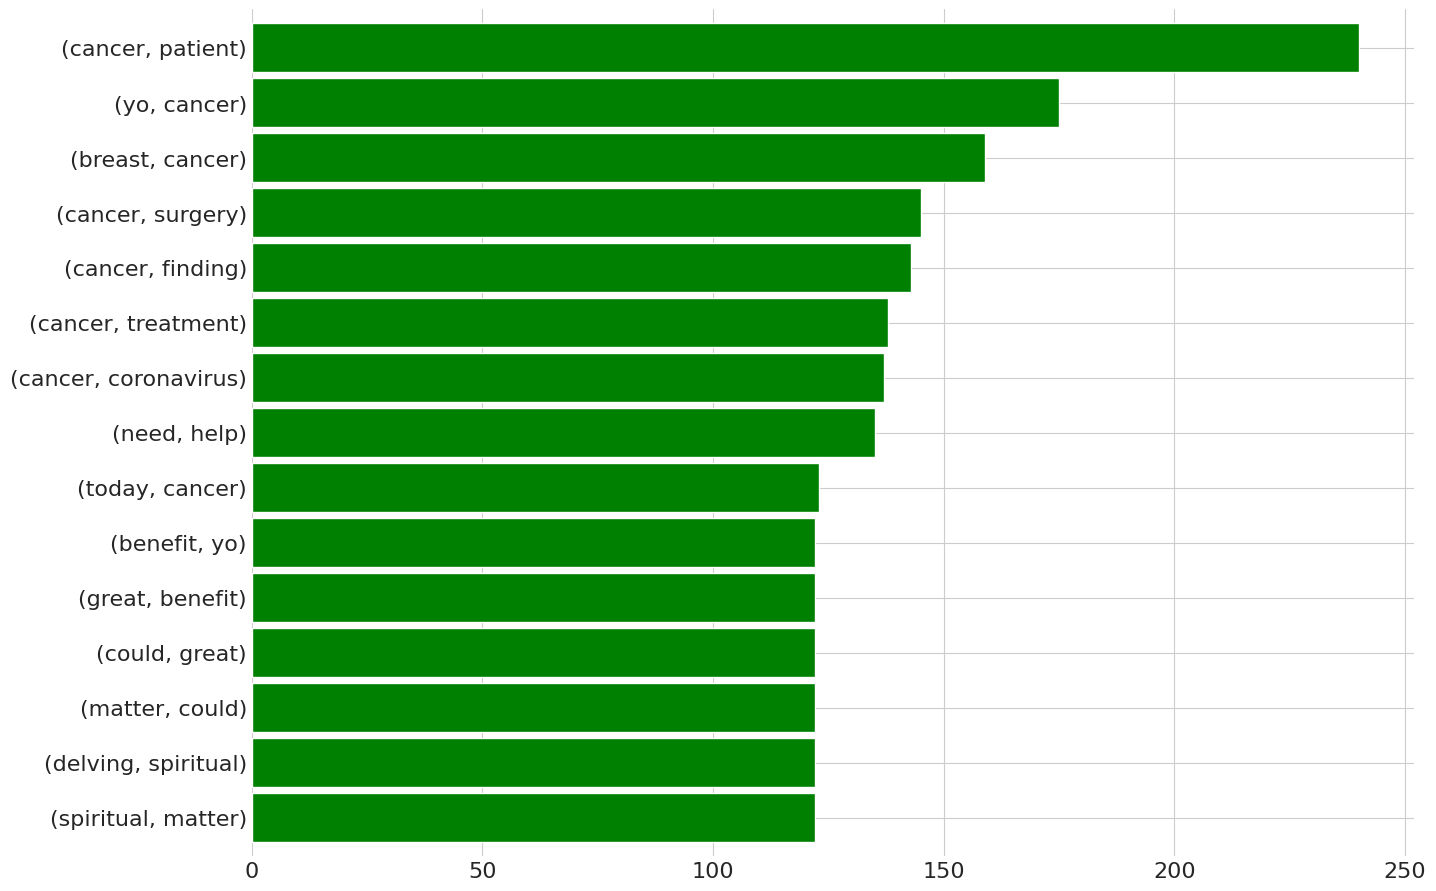

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:15]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:15]

bigrams_series.sort_values().plot.barh(color = 'green', width = 0.9, figsize = (15, 11))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '(fresh, career, challenge)'),
  Text(0, 1, '(career, challenge, worthwhile)'),
  Text(0, 2, '(finding, fresh, career)'),
  Text(0, 3, '(move, certain, direction)'),
  Text(0, 4, '(desire, move, certain)'),
  Text(0, 5, '(certain, direction, cancer)'),
  Text(0, 6, '(despite, strong, desire)'),
  Text(0, 7, '(challenge, worthwhile, goal)'),
  Text(0, 8, '(worthwhile, goal, today)'),
  Text(0, 9, '(spiritual, matter, could)'),
  Text(0, 10, '(delving, spiritual, matter)'),
  Text(0, 11, '(matter, could, great)'),
  Text(0, 12, '(great, benefit, yo)'),
  Text(0, 13, '(could, great, benefit)'),
  Text(0, 14, '(benefit, yo, cancer)')])

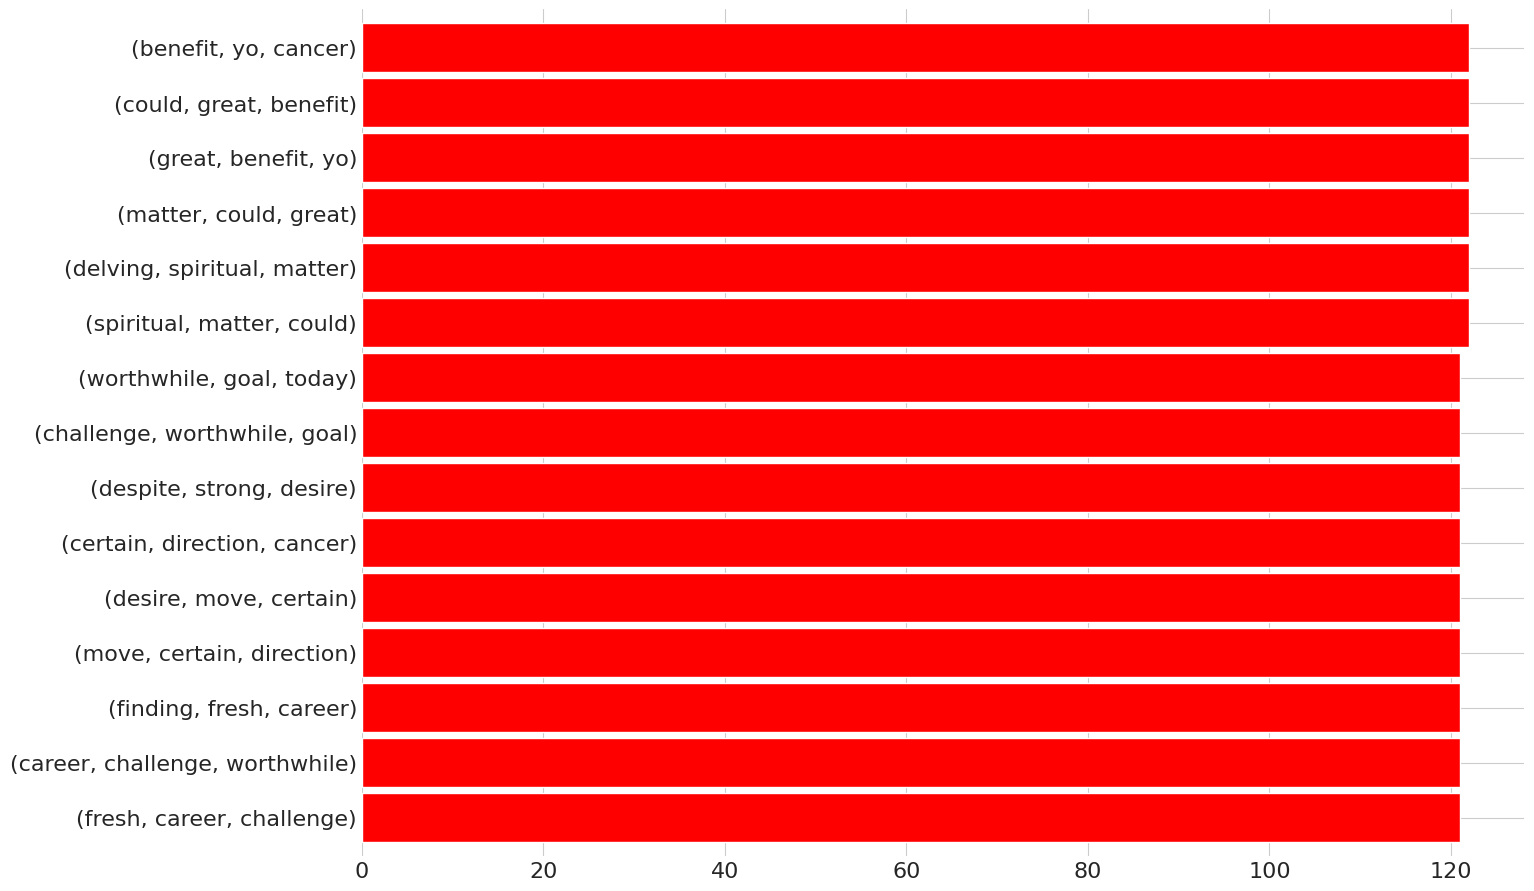

In [ ]:
trigrams_series.sort_values().plot.barh(color = 'red', width = 0.9, figsize = (15, 11))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# **Building the model followed by training & testing**

In [ ]:
# Load the dataset
data = pd.read_csv('/content/canada_tweet_with_emotions.csv')
data.columns

Index(['likes', 'screen_name', 'text', 'timestamp', 'tweet_id', 'user_id',
       'username', 'city', 'emotion', 'sentiment_score', 'emotion_analysed'],
      dtype='object')

In [ ]:
# Inspect the dataset
print(dataset.head())

# Check the distribution of labels
label_counts = dataset['emotion'].value_counts()
print("Label distribution:")
print(label_counts)

# Extract input texts and labels
texts = dataset['text'].tolist()
labels = dataset['emotion'].tolist()

# Print some example labels before processing
print("Labels before:", labels[:8])

# Further processing steps (if any)
# For example, encoding labels or preprocessing input texts

# Now, inspect the labels after processing
print("Labels after:", labels[:8])

   likes screen_name                                               text  \
0      1     marlawd  recent cancer patient w longstanding respirato...   
1      1     marlawd  recent cancer patient w longstanding respirato...   
2      4     marlawd  im supposed attend ontliberal leadership conve...   
3      4     marlawd  im supposed attend ontliberal leadership conve...   
4      1      ghlake  buy bulk things sale freezer stocked im good e...   

             timestamp             tweet_id    user_id       username  \
0  2020-03-06 14:38:24  1235937783283437568   49687037  marla waltman   
1  2020-03-06 14:38:24  1235937783283437568   49687037  marla waltman   
2  2020-03-03 14:10:21  1234843558009544704   49687037  marla waltman   
3  2020-03-03 14:10:21  1234843558009544704   49687037  marla waltman   
4  2020-03-01 02:28:25  1233942136384577536  169051022   linda bowser   

      city   emotion  sentiment_score emotion_analysed  
0  Toronto  negative        -0.137143              Sa

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report


# Drop rows with missing values
data.dropna(subset=['text', 'emotion'], inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['emotion'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and train the classifier
classifier = LinearSVC()
classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
predictions = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.8548913043478261

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.71      0.75       373
     neutral       0.82      0.87      0.84       518
    positive       0.90      0.90      0.90       949

    accuracy                           0.85      1840
   macro avg       0.84      0.83      0.83      1840
weighted avg       0.85      0.85      0.85      1840



In [ ]:
print(len(texts))
print(len(labels))


9206
8


In [ ]:
# Drop rows with missing values
data.dropna(subset=['text', 'emotion'], inplace=True)

# Convert emotions to numerical labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['emotion'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize input text data
def tokenize_text(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

# Tokenize training and testing data
train_tokens = [tokenize_text(text) for text in X_train]
test_tokens = [tokenize_text(text) for text in X_test]

# Convert tokenized data to PyTorch DataLoader
train_dataset = TensorDataset(
    torch.cat([token['input_ids'] for token in train_tokens], dim=0),
    torch.cat([token['attention_mask'] for token in train_tokens], dim=0),
    torch.tensor(y_train.values)
)

test_dataset = TensorDataset(
    torch.cat([token['input_ids'] for token in test_tokens], dim=0),
    torch.cat([token['attention_mask'] for token in test_tokens], dim=0),
    torch.tensor(y_test.values)
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Fine-tune BERT model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluate the fine-tuned BERT model
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(labels.tolist())

# Calculate accuracy and classification report
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=label_encoder.classes_))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#**Using BERT**

In [ ]:
df = senwave.drop(['user_id'], axis = 1)
df['list'] = df[df.columns[1:12]].values.tolist()
new_df = df[['text', 'list']].copy()
new_df.head()

,text,list
0,recent cancer patient w longstanding respirato...,"[marlawd, recent cancer patient w longstanding..."
1,recent cancer patient w longstanding respirato...,"[marlawd, recent cancer patient w longstanding..."
2,im supposed attend ontliberal leadership conve...,"[marlawd, im supposed attend ontliberal leader..."
3,im supposed attend ontliberal leadership conve...,"[marlawd, im supposed attend ontliberal leader..."
4,buy bulk things sale freezer stocked im good e...,"[ghlake, buy bulk things sale freezer stocked ..."


**Preparing the dataset**

In [ ]:
MAX_LEN = 200 #based on length of tweets
TRAIN_BATCH_SIZE = 1
VALID_BATCH_SIZE = 1
EPOCHS = 4
LEARNING_RATE = 1e-05 #tried 1e-03, 1e-04, 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.dataframe = dataframe
        self.tweet = dataframe['Tweet']
        self.targets = self.dataframe.list
        self.max_len = max_len

    def __len__(self):
        return len(self.tweet)

    def __getitem__(self, index):
        tweet = str(self.tweet[index])
        tweet = " ".join(tweet.split())

        inputs = self.tokenizer.encode_plus(
            tweet,
            None,
            add_special_tokens = True,
            max_length = self.max_len,
            pad_to_max_length = True,
            return_token_type_ids = True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return {
            'ids' : torch.tensor(ids, dtype = torch.long),
            'mask' : torch.tensor(mask, dtype = torch.long),
            'token_type_ids' : torch.tensor(token_type_ids, dtype = torch.long),
            'targets' : torch.tensor(self.targets[index], dtype = torch.float)
        }

In [ ]:
train_dataset = sen_train.drop(['user_id'], axis = 1)
train_dataset['list'] = train_dataset[train_dataset.columns[1:12]].values.tolist()
train_df = train_dataset[['text', 'list']].copy()
train_df = train_df.reset_index(drop = True)

test_dataset = sen_test.drop(['user_id'], axis = 1)
test_dataset['list'] = test_dataset[test_dataset.columns[1:12]].values.tolist()
test_df = test_dataset[['text', 'list']].copy()
test_df = test_df.reset_index(drop = True)

In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

**Creating the Transformer model**

In [ ]:
class BERT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.layer2 = torch.nn.Dropout(0.3)
        self.layer3 = torch.nn.Linear(768, 11)

    def forward(self, ids, mask, token_type_ids, return_dict = False):
        unw, out_1 = self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        out_2 = self.layer2(out_1)
        out_final = self.layer3(out_2)
        return out_final

model = BERT()
model.to(device)

BERT(
  (layer1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru

In [ ]:
torch.save(model, f = '/content/COVID19_sentinentanalysissocialmedia/models/bertmodel.pth')

**Conclusion**

Data Preprocessing: We loaded the canada_tweets dataset and performed preprocessing steps like encoding labels using LabelEncoder and splitting the dataset into train and test sets using train_test_split.

Tokenization: We used the BERT tokenizer from the Hugging Face transformers library to tokenize the text data. Tokenization involves breaking down the text into tokens and converting them into numerical representations suitable for input to the BERT model.

Model Building: We utilized the pre-trained BERT model for sequence classification (BertForSequenceClassification) for sentiment analysis. This model has been pre-trained on a large corpus and fine-tuned for sequence classification tasks.

Training: We trained the BERT-based sentiment analysis model on the training dataset using PyTorch. This involved defining the optimizer, scheduler, and training loop to update the model parameters based on the training data.

Evaluation: We evaluated the trained model's performance on the test dataset using accuracy and classification report metrics. This provided insights into how well the model generalized to unseen data and its performance across different sentiment classes.

**Inference**

Top Users by Tweet Counts: The ten users with the most tweets were determined.
This shows who the most active users are on the network.

Top Users by Likes: The ten users with the most likes overall on their tweets were also determined.The quantity of likes indicates which users have the most interesting content.                                                                        

Emotion Analysis: Using sentiment scores as a guide, we classified tweets into various emotion categories. We were able to discern the general sentiment and emotional tone of the tweets by displaying the distribution of emotions.

Correlation Analysis: We looked at the relationships between the various emotional classifications. This made it easier for us to spot any possible connections or trends among the dataset's various emotions.                                                                       

User involvement: We were able to gather information on user involvement on the site by looking at tweet counts and likes. Strategies for boosting interaction and forging a stronger community can be informed by knowledge of the most active users and the most liked tweets.

Visualization: To make it simpler to understand the data and derive conclusions, we presented our findings using eye-catching graphs.

All things considered, these analyses offer insightful information on user behavior, engagement with content, and the emotional content of tweets on the network. User engagement campaigns, content strategies, and decision-making procedures can all benefit from these findings.